# 📊 Sales Forecasting for Retail Chain – Starter Notebook

Use this notebook to explore the dataset and prepare your sales forecasting model.

**Dataset:** `retail_sales_forecasting_data.csv`

In [2]:
# 📦 Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from deep_translator import GoogleTranslator

In [3]:
# 📁 Load Dataset
df_dirty = pd.read_csv("retail_sales_forecasting_data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_dirty.head()

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness,Unnamed: 0,division,format,city,area,day_of_week,is_weekend
0,2031-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,0.0155,0.015,NaN,3,Div1,Format-1,City1,1500,0,0
1,2031-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,0.5000,0.500,NaN,3,Div1,Format-1,City1,1500,0,0
2,2031-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,NaN,NaN,NaN,3,Div1,Format-1,City1,1500,0,0
3,2031-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,0.2000,0.200,NaN,3,Div1,Format-1,City1,1500,0,0
4,2031-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,0.3500,0.350,1.5,3,Div1,Format-1,City1,1500,0,0


## 🔍 Data understanding

In [4]:
df_dirty.info()
df_dirty.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432685 entries, 0 to 7432684
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   item_id        object 
 2   quantity       float64
 3   price_base     float64
 4   sum_total      float64
 5   store_id       int64  
 6   dept_name      object 
 7   class_name     object 
 8   subclass_name  object 
 9   item_type      object 
 10  weight_volume  float64
 11  weight_netto   float64
 12  fatness        float64
 13  Unnamed: 0     int64  
 14  division       object 
 15  format         object 
 16  city           object 
 17  area           int64  
 18  day_of_week    int64  
 19  is_weekend     int64  
dtypes: float64(6), int64(5), object(9)
memory usage: 1.1+ GB


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness,Unnamed: 0,division,format,city,area,day_of_week,is_weekend
count,7432685,7432685,7.432685e+06,7.432685e+06,7.432685e+06,7.432685e+06,7396100,7396100,7396100,6741315,5.996495e+06,6.317969e+06,652776.000000,7.432685e+06,7432685,7432685,7432685,7.432685e+06,7.432685e+06,7.432685e+06
unique,761,28182,NaN,NaN,NaN,NaN,182,535,784,604,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN
top,2031-12-30,e5b2b6f57ea7,NaN,NaN,NaN,NaN,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,СИГАРЕТЫ,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Светлое,NaN,NaN,NaN,NaN,Div1,Format-1,City1,NaN,NaN,NaN
freq,16410,2571,NaN,NaN,NaN,NaN,275575,186033,425448,196791,NaN,NaN,NaN,NaN,5264205,3683750,5021639,NaN,NaN,NaN
mean,NaN,NaN,5.642398e+00,2.075824e+02,7.612796e+02,2.041405e+00,NaN,NaN,NaN,NaN,1.366106e+00,3.732010e-01,15.558757,1.958595e+00,NaN,NaN,NaN,1.194647e+03,2.963733e+00,2.871552e-01
std,NaN,NaN,2.740466e+01,3.372886e+02,4.789478e+03,1.206728e+00,NaN,NaN,NaN,NaN,9.430702e+00,2.777690e+00,22.858583,1.206728e+00,NaN,NaN,NaN,6.740661e+02,2.034034e+00,4.524346e-01
min,NaN,NaN,-5.000000e+02,-2.167667e+04,-2.041080e+04,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e-05,0.000000e+00,0.030000,0.000000e+00,NaN,NaN,NaN,1.090000e+02,0.000000e+00,0.000000e+00
25%,NaN,NaN,1.000000e+00,6.000000e+01,1.279000e+02,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e-01,1.000000e-01,2.500000,1.000000e+00,NaN,NaN,NaN,2.100000e+02,1.000000e+00,0.000000e+00
50%,NaN,NaN,2.000000e+00,1.099000e+02,2.596000e+02,2.000000e+00,NaN,NaN,NaN,NaN,2.500000e-01,2.200000e-01,4.000000,2.000000e+00,NaN,NaN,NaN,1.500000e+03,3.000000e+00,0.000000e+00
75%,NaN,NaN,4.672000e+00,1.999000e+02,5.990000e+02,3.000000e+00,NaN,NaN,NaN,NaN,5.000000e-01,4.500000e-01,15.000000,3.000000e+00,NaN,NaN,NaN,1.500000e+03,5.000000e+00,1.000000e+00


In [5]:
# Check unique values per column
unique_values_per_column = df_dirty.nunique()

# Print results
print(unique_values_per_column)

date                761
item_id           28182
quantity          62422
price_base       126497
sum_total        471682
store_id              4
dept_name           182
class_name          535
subclass_name       784
item_type           604
weight_volume       477
weight_netto        614
fatness             108
Unnamed: 0            4
division              2
format                4
city                  3
area                  4
day_of_week           7
is_weekend            2
dtype: int64


In [6]:
columns_to_check = ['area', 'city', 'format', 'division', 'Unnamed: 0', 'store_id']
for column in columns_to_check:
    print(f"Unique values for {column}: {df_dirty[column].unique()}")

Unique values for area: [1500  210  109 1887]
Unique values for city: ['City1' 'City2' 'City3']
Unique values for format: ['Format-1' 'Format-6' 'Format-7 express' 'MaxiEuro']
Unique values for division: ['Div1' 'Div2']
Unique values for Unnamed: 0: [3 2 1 0]
Unique values for store_id: [1 2 3 4]


In [7]:
missing_counts = df_dirty.isna().sum()
total_counts = df_dirty.shape[0]  # Total number of rows

result = pd.DataFrame({
    'Missing Values': missing_counts,
    'Total Values': total_counts,
    'Missing Percentage': (missing_counts / total_counts * 100).round(2)
})

print(result)



               Missing Values  Total Values  Missing Percentage
date                        0       7432685                0.00
item_id                     0       7432685                0.00
quantity                    0       7432685                0.00
price_base                  0       7432685                0.00
sum_total                   0       7432685                0.00
store_id                    0       7432685                0.00
dept_name               36585       7432685                0.49
class_name              36585       7432685                0.49
subclass_name           36585       7432685                0.49
item_type              691370       7432685                9.30
weight_volume         1436190       7432685               19.32
weight_netto          1114716       7432685               15.00
fatness               6779909       7432685               91.22
Unnamed: 0                  0       7432685                0.00
division                    0       7432

In [8]:
# Check which store is linked to which city
store_city_mapping = df_dirty[['store_id', 'city']].drop_duplicates()

# Print the mapping without row numbers
print(store_city_mapping.to_string(index=False))

 store_id  city
        1 City1
        2 City1
        3 City2
        4 City3


In [9]:
# Add time-based features
df_dirty['date'] = pd.to_datetime(df_dirty['date'])
df_dirty['month'] = df_dirty['date'].dt.month
df_dirty['year'] = df_dirty['date'].dt.year
df_dirty['week'] = df_dirty['date'].dt.isocalendar().week

In [10]:
# Group by 'year' and 'store_id' and count unique values in each column
unique_values_per_year_store = df_dirty.groupby(['year', 'store_id']).nunique()

# Print results
unique_values_per_year_store

date  item_id  quantity  price_base  sum_total  dept_name  \
year store_id                                                              
2030 1          126    16108     18784       47514     127203        174   
     2          126     6353      7136       19651      44448        158   
     3          125     3144      3548        8625      22935        132   
2031 1          365    19661     33992       79687     248111        176   
     2          365     7606     11767       35489      89038        159   
     3          365     3920      5471       17610      49906        136   
     4           19    11868      6333       20809      36943        172   
2032 1          270    17970     26829       76748     223750        173   
     2          270     6854     10803       33930      78983        159   
     3          270     3128      5361       16525      43450        135   
     4          270    17374     28442       85442     246368        174   

               class_name  subclass_name  item_type  weight_volume  \
year store_id                                                        
2030 1                502            715        561            408   
     2                409            570        442            289   
     3                317            403        335            209   
2031 1                517            755        577            432   
     2                424            597        463            307   
     3                331            424        356            223   
     4                486            677        535            374   
2032 1                502            722        574            403   
     2                418            576        447            278   
     3                309            397        337            189   
     4                502            717        574            399   

               weight_netto  fatness  Unnamed: 0  division  format  city  \
year store_id                                                              
2030 1                  507       90           1         1       1     1   
     2                  312       73           1         1       1     1   
     3                  208       57           1         1       1     1   
2031 1                  553       95           1         1       1     1   
     2                  331       71           1         1       1     1   
     3                  233       54           1         1       1     1   
     4                  423       79           1         1       1     1   
2032 1                  505       88           1         1       1     1   
     2                  289       71           1         1       1     1   
     3                  204       52           1         1       1     1   
     4                  485       84           1         1       1     1   

               area  day_of_week  is_weekend  month  week  
year store_id                                              
2030 1            1            7           2      5    19  
     2            1            7           2      5    19  
     3            1            7           2      5    19  
2031 1            1            7           2     12    52  
     2            1            7           2     12    52  
     3            1            7           2     12    52  
     4            1            7           2      1     4  
2032 1            1            7           2      9    39  
     2            1            7           2      9    39  
     3            1            7           2      9    39  
     4            1            7           2      9    39

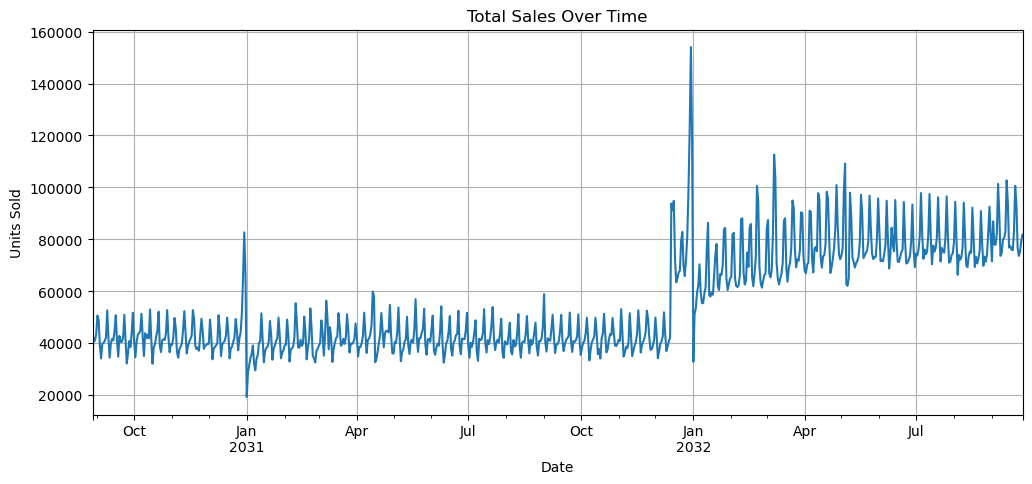

In [11]:
# Example: Daily sales trend
df_dirty['date'] = pd.to_datetime(df_dirty['date'])
daily_sales = df_dirty.groupby('date')['quantity'].sum()
daily_sales.plot(figsize=(12,5), title="Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

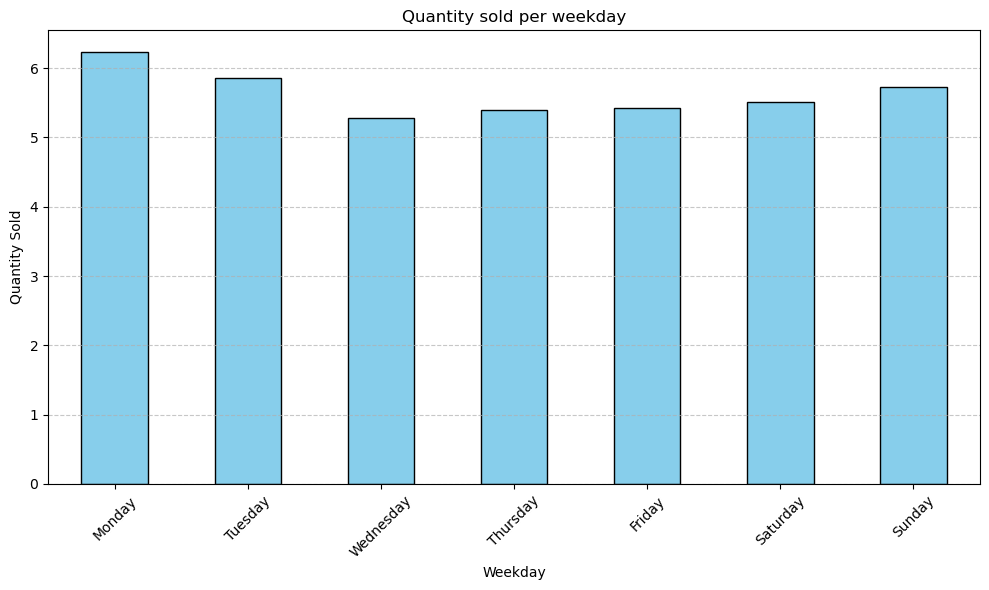

In [12]:
# Map day_of_week to weekday names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_dirty['day_of_week_text'] = df_dirty['day_of_week'].map(day_mapping)

# Reorder days to standard week format
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day_of_week_text and sum the quantity
quantity_per_weekday = df_dirty.groupby('day_of_week_text')['quantity'].mean()

# Order the days according to the standard week format
quantity_per_weekday = quantity_per_weekday.reindex(ordered_days, fill_value=0)

# Make a bar plot
plt.figure(figsize=(10, 6))
quantity_per_weekday.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Quantity sold per weekday')
plt.xlabel('Weekday')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.show()

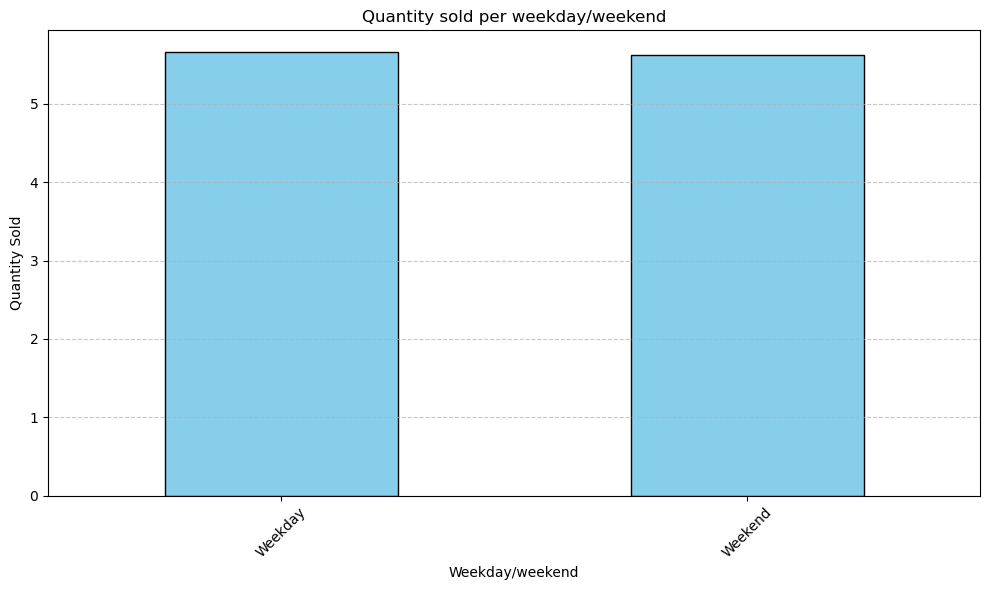

In [13]:
# Map is_weekend to weekday or weekend names
weekend_mapping = {0: 'Weekday', 1: 'Weekend'}
df_dirty['weekend_text'] = df_dirty['is_weekend'].map(weekend_mapping)

# Group by day_of_week_text and sum the quantity
quantity_weekend_or_day= df_dirty.groupby('weekend_text')['quantity'].mean()

# Make a bar plot
plt.figure(figsize=(10, 6))
quantity_weekend_or_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Quantity sold per weekday/weekend')
plt.xlabel('Weekday/weekend')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.show()

## 🧹 Data preperation

### 🧹 Data cleaning

In [14]:
# Drop unnecessary columns
columns_to_drop = ['fatness','weight_netto','weight_volume','class_name','subclass_name','item_type','Unnamed: 0', 'division', 'format', 'area',]
df = df_dirty.drop(columns=columns_to_drop)



In [15]:
# Count the number of empty (NaN) rows for each column
missing_counts = df.isna().sum()

# Display the result
print(missing_counts)

date                    0
item_id                 0
quantity                0
price_base              0
sum_total               0
store_id                0
dept_name           36585
city                    0
day_of_week             0
is_weekend              0
month                   0
year                    0
week                    0
day_of_week_text        0
weekend_text            0
dtype: int64


In [16]:
# Drop rows where 'dept_name' is empty
df = df.dropna(subset=['dept_name'])

# Count the number of empty (NaN) rows for each column
missing_counts = df.isna().sum()

# Display the result
print(missing_counts)

df.head()

date                0
item_id             0
quantity            0
price_base          0
sum_total           0
store_id            0
dept_name           0
city                0
day_of_week         0
is_weekend          0
month               0
year                0
week                0
day_of_week_text    0
weekend_text        0
dtype: int64


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,city,day_of_week,is_weekend,month,year,week,day_of_week_text,weekend_text
0,2031-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,City1,0,0,8,2031,32,Monday,Weekday
1,2031-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,City1,0,0,8,2031,32,Monday,Weekday
2,2031-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,City1,0,0,8,2031,32,Monday,Weekday
3,2031-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,City1,0,0,8,2031,32,Monday,Weekday
4,2031-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,City1,0,0,8,2031,32,Monday,Weekday


In [17]:
# Drop rows where 'quantity' == '0'
df = df[df['quantity'] != 0]

In [18]:
# Filter rows where quantity is 0
zero_quantity_rows = df[df['quantity'] == 0]

# Display the rows
print(zero_quantity_rows)

Empty DataFrame
Columns: [date, item_id, quantity, price_base, sum_total, store_id, dept_name, city, day_of_week, is_weekend, month, year, week, day_of_week_text, weekend_text]
Index: []


In [19]:
# Drop rows where 'price_base' == '0'
df = df[df['price_base'] != 0]

In [20]:
# Filter rows where quantity is 0
zero_quantity_rows = df[df['price_base'] == 0]

# Display the rows
print(zero_quantity_rows)

Empty DataFrame
Columns: [date, item_id, quantity, price_base, sum_total, store_id, dept_name, city, day_of_week, is_weekend, month, year, week, day_of_week_text, weekend_text]
Index: []


### 🧹 Data integration

In [21]:
# Create a copy of the DataFrame for holiday processing
df_holidays = df.copy()

# Set up Russian holidays for relevant years in the data
years_in_data = df_holidays['date'].dt.year.unique()
ru_holidays = holidays.CountryHoliday('RU', years=years_in_data)

# Flag public holidays
df_holidays['is_holiday'] = df_holidays['date'].dt.date.isin(ru_holidays)

# Check if the holidays were added correctly
df_holidays.head()

,date,item_id,quantity,price_base,sum_total,store_id,dept_name,city,day_of_week,is_weekend,month,year,week,day_of_week_text,weekend_text,is_holiday
0,2031-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,City1,0,0,8,2031,32,Monday,Weekday,False
1,2031-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,City1,0,0,8,2031,32,Monday,Weekday,False
2,2031-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,City1,0,0,8,2031,32,Monday,Weekday,False
3,2031-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,City1,0,0,8,2031,32,Monday,Weekday,False
4,2031-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,City1,0,0,8,2031,32,Monday,Weekday,False


### 🧹 Feature Engineering

In [22]:
# Assuming your full DataFrame is called df
df_translated = df_holidays.copy()
df_subset = df_translated.head(10000).copy()

columns_to_translate = ['dept_name',]

# Dictionary to hold translation maps for all columns
translation_maps = {}

for col in columns_to_translate:
    print(f"Translating column: {col}")
    
    unique_vals = df_subset[col].dropna().unique()
    translation_map = {}
    
    for val in unique_vals:
        try:
            translated = GoogleTranslator(source='auto', target='en').translate(val)
            translation_map[val] = translated
        except Exception as e:
            print(f"Error translating '{val}': {e}")
            translation_map[val] = val  # fallback
    
    # Save this map for later use on the full df
    translation_maps[col] = translation_map

# Now map translations to the original df
for col in columns_to_translate:
    df_translated[col + '_en'] = df_translated[col].map(translation_maps[col])


Translating column: dept_name


In [23]:
# Ensure columns_to_translate and translation_maps already exist
for col in columns_to_translate:
    print(f"Extending translations for column: {col}")
    
    # Get the current map (may already include some translations)
    translation_map = translation_maps.get(col, {})
    
    # Get all unique values from the full dataset
    unique_vals = df_translated[col].dropna().unique()
    
    for val in unique_vals:
        if val not in translation_map:  # Only translate new values
            try:
                translated = GoogleTranslator(source='auto', target='en').translate(val)
                translation_map[val] = translated
            except Exception as e:
                print(f"Error translating '{val}': {e}")
                translation_map[val] = val  # fallback
    
    # Update the main dictionary
    translation_maps[col] = translation_map

# Apply updated maps to the full DataFrame
for col in columns_to_translate:
    df_translated[col + '_en'] = df_translated[col].map(translation_maps[col])

# Check the translations
df_translated.head()

Extending translations for column: dept_name


,date,item_id,quantity,price_base,sum_total,store_id,dept_name,city,day_of_week,is_weekend,month,year,week,day_of_week_text,weekend_text,is_holiday,dept_name_en
0,2031-08-04,293375605257,1.000,47.86,47.86,1,ПРИКАССА,City1,0,0,8,2031,32,Monday,Weekday,False,View
1,2031-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1,ЛИМОНАДЫ,City1,0,0,8,2031,32,Monday,Weekday,False,Lemonades
2,2031-08-04,daa46ef49b7a,0.822,379.00,311.54,1,СЛОЙКА,City1,0,0,8,2031,32,Monday,Weekday,False,Interlocation
3,2031-08-04,a3b49c1bf758,1.000,129.00,129.00,1,ПЕРСОНАЛЬНЫЙ УХОД,City1,0,0,8,2031,32,Monday,Weekday,False,Personal care
4,2031-08-04,ab611c5cef62,7.000,79.90,559.30,1,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,City1,0,0,8,2031,32,Monday,Weekday,False,Modern dairy category


In [24]:
# Group by 'dept_name' and count unique values in 'dept_name_en'
unique_counts = df_translated.groupby('dept_name')['dept_name_en'].nunique().reset_index()

# Rename columns for clarity
unique_counts.columns = ['dept_name', 'unique_dept_name_en_count']

# Print the result
print(unique_counts)

                              dept_name  unique_dept_name_en_count
0                            АВТОТОВАРЫ                          1
1                АКСЕССУАРЫ ДЛЯ КУРЕНИЯ                          1
2                      АКЦИЯ ЛОЯЛЬНОСТИ                          1
3    АКЦИЯ ЛОЯЛЬНОСТИ (НЕ ИСПОЛЬЗОВАТЬ)                          1
4                    БЕЛАЯ РЫБА МОРСКАЯ                          1
5        БЕЛАЯ РЫБА МОРСКАЯ ОХЛАЖДЕННАЯ                          1
6                     БЕЛАЯ РЫБА РЕЧНАЯ                          1
7         БЕЛАЯ РЫБА РЕЧНАЯ ОХЛАЖДЕННАЯ                          1
8              БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ                          1
9                               БУРГЕРЫ                          1
10                           БУТЕРБРОДЫ                          1
11                      БЫСТРЫЙ ПЕРЕКУС                          1
12                          ВАРЕНЬЕ,МЁД                          1
13                                 ВИНО                       

In [25]:
# Check which store is linked to which city
store_city_mapping = df_translated[['dept_name', 'dept_name_en']].drop_duplicates()

# Print the mapping without row numbers
print(store_city_mapping.to_string(index=False))

                         dept_name                                dept_name_en
                          ПРИКАССА                                        View
                          ЛИМОНАДЫ                                   Lemonades
                            СЛОЙКА                               Interlocation
                 ПЕРСОНАЛЬНЫЙ УХОД                               Personal care
    СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ                       Modern dairy category
                   СПЕЦИИ,ПРИПРАВА                           Spices, seasoning
                             ЧИПСЫ                                       CHIPS
                КОРЖИ И ТАРТАЛЕТКИ                         Corges and tartlets
          НЕСЛАДКИЕ МУЧНЫЕ ИЗДЕЛИЯ                         Ugly flour products
                            ФРУКТЫ                                      FRUITS
          БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ                              Paper products
                              ВИНО                  

In [26]:
df_discount = df_translated.copy()

# Calculate unit price with a maximum of 2 decimals
df_discount['unit_price'] = (df_discount['sum_total'] / df_discount['quantity']).round(2)

# Adjust the price_status logic to account for a 2-cent tolerance
df_discount['price_status'] = df_discount.apply(
    lambda row: "Normal price" if abs(row['unit_price'] - row['price_base']) <= 0.02 else "Discount",
    axis=1
)

# Display the updated DataFrame
print(df_discount[['unit_price', 'price_base', 'price_status']].head())


   unit_price  price_base  price_status
0       47.86       47.86  Normal price
1       49.60       49.60  Normal price
2      379.00      379.00  Normal price
3      129.00      129.00  Normal price
4       79.90       79.90  Normal price


In [27]:
# Filter rows where a discount was applied
discounted_transactions = df_discount[df_discount['price_status'] == "Discount"]

# Display the first few rows of discounted transactions
print(discounted_transactions.head())

Empty DataFrame
Columns: [date, item_id, quantity, price_base, sum_total, store_id, dept_name, city, day_of_week, is_weekend, month, year, week, day_of_week_text, weekend_text, is_holiday, dept_name_en, unit_price, price_status]
Index: []


C:\Users\markh\AppData\Local\Temp\ipykernel_16380\1305449866.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_depts_by_season = grouped.groupby('season').apply(


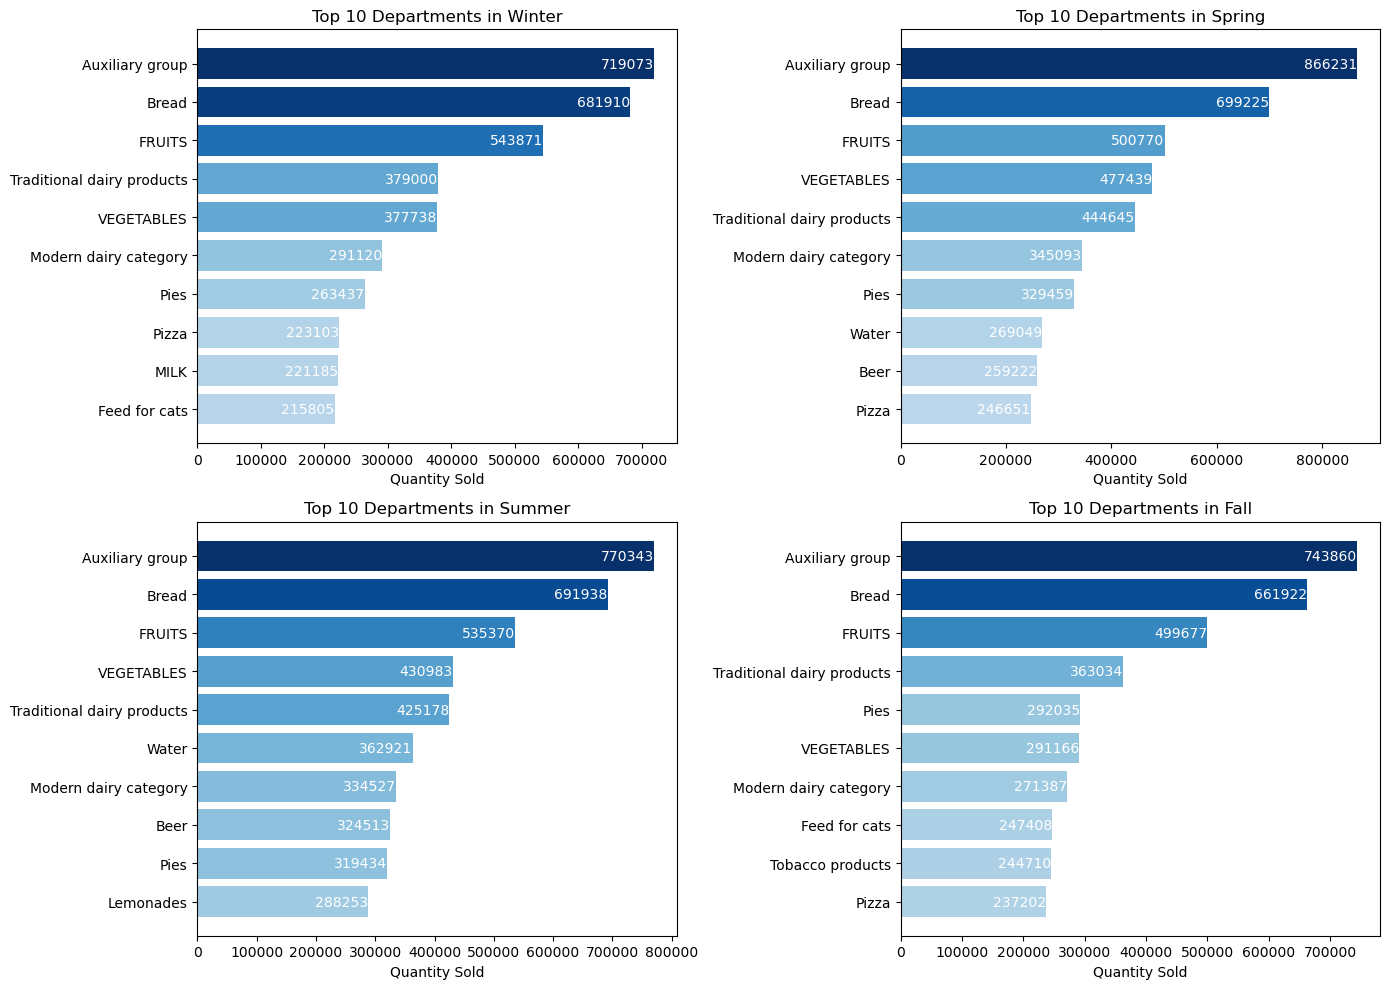

In [28]:
df_season = df_discount.copy()

# Function to assign season based on month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Assign seasons
df_season['season'] = df_season['date'].apply(get_season)

# Group by season, store_id, and dept_name, summing the quantity
grouped = df_season.groupby(['season', 'store_id', 'dept_name_en'])['quantity'].sum().reset_index()

# For each season, get the Top 10 most sold departments (removes duplication of departments across stores)
top_depts_by_season = grouped.groupby('season').apply(
    lambda x: x.groupby('dept_name_en').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
).reset_index()

# Create 4 plots for each season (Winter, Spring, Summer, Fall)
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid of plots

# Loop through each season and plot the top departments
for i, season in enumerate(seasons):
    season_data = top_depts_by_season[top_depts_by_season['season'] == season]
    ax = axs[i // 2, i % 2]  # Determine the position for the subplot

    bars = ax.barh(season_data['dept_name_en'], season_data['quantity'], color=plt.cm.Blues(season_data['quantity'] / max(season_data['quantity'])))

    # Add annotations on the bars
    for bar in bars:
        ax.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center', ha='right', color='white')

    ax.set_xlabel('Quantity Sold')
    ax.set_title(f'Top 10 Departments in {season}')
    ax.invert_yaxis()  # Highest on top

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


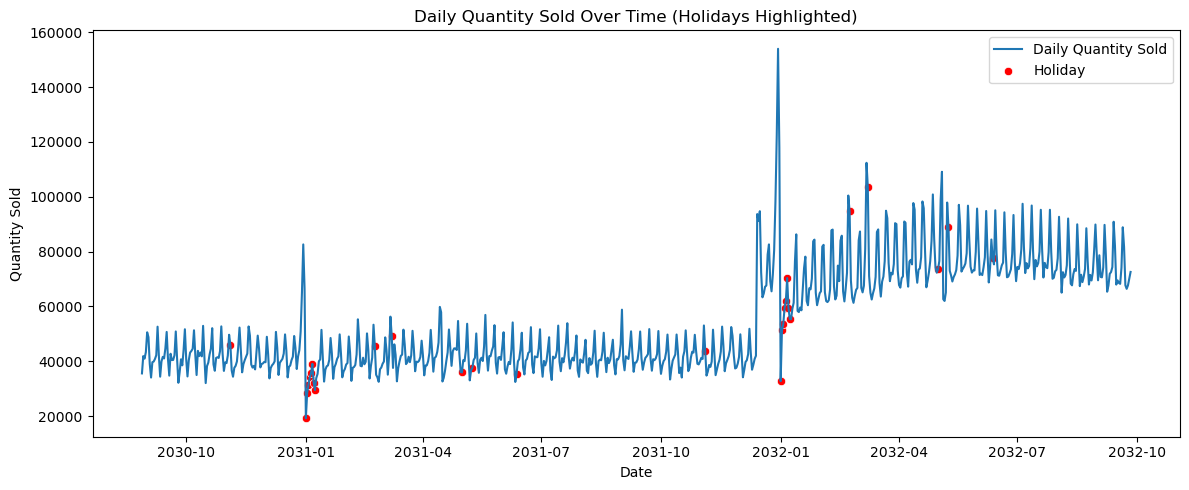

In [29]:
df_holiday_sales = df_season.copy()
 
# Group by date to get daily quantity sold
df_daily_holiday_sales = df_holiday_sales.groupby('date').agg(
    quantity=('quantity', 'sum'),
    is_holiday=('is_holiday', 'max')  # True if at least one row on that day is a holiday
).reset_index()
 
# Plot: Daily Quantity Sold with Holidays Highlighted
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_daily_holiday_sales, x='date', y='quantity', label='Daily Quantity Sold')
sns.scatterplot(data=df_daily_holiday_sales[df_daily_holiday_sales['is_holiday']], x='date', y='quantity', color='red', label='Holiday')
plt.title('Daily Quantity Sold Over Time (Holidays Highlighted)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

In [30]:
df_modeling = df_holiday_sales.copy()

# Filter the DataFrame for store_id = 3
df_store_3 = df_modeling[df_modeling['store_id'] == 3]

# Display the first few rows of the filtered DataFrame
print(df_store_3.head())

              date       item_id  quantity  price_base  sum_total  store_id  \
5021639 2031-09-14  8acf1d1a462d       4.0       170.0      680.0         3   
5021640 2031-09-14  e99f16f558ed       5.0       129.9      649.5         3   
5021641 2031-09-14  e3a694ee1474       6.0        79.9      479.4         3   
5021642 2031-09-14  2d48b35e9777       5.0       119.9      599.5         3   
5021643 2031-09-14  783ed93af461       1.0        74.9       74.9         3   

                        dept_name   city  day_of_week  is_weekend  month  \
5021639          ТАБАЧНЫЕ ИЗДЕЛИЯ  City2            6           1      9   
5021640              СЫРЫ ШТУЧНЫЕ  City2            6           1      9   
5021641                  ЛИМОНАДЫ  City2            6           1      9   
5021642  СЛАБОАЛКОГОЛЬНЫЕ НАПИТКИ  City2            6           1      9   
5021643                     ЧИПСЫ  City2            6           1      9   

         year  week day_of_week_text weekend_text  is_holiday  \
502

In [31]:
# Count the rows in the filtered DataFrame
row_count = df_store_3.shape[0]

# Print the row count
print(f"Number of rows in df_store_3: {row_count}")

Number of rows in df_store_3: 827320


In [32]:
df_subset = df_store_3.head(827320).copy()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
 
y = df_subset['quantity']
features = ['store_id', 'city',
            'day_of_week','is_holiday', 'season']
X = df_subset[features]
# Define column types
categorical_features = ['store_id', 'city', 'season']
numeric_features = ['day_of_week', 'is_holiday']
 
# Preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
 
# Build pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])
 
 
 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['day_of_week',
                                                   'is_holiday']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['store_id', 'city',
                                                   'season'])])),
                ('regressor', KNeighborsRegressor())])

In [35]:
y_pred = knn_pipeline.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("Mean Squared Error:", mse)
print("R-squared:", r2)

KeyboardInterrupt: 

In [36]:
# Count the number of rows in the DataFrame
row_count = df_modeling.shape[0]
print(f"The DataFrame has {row_count} rows.")

The DataFrame has 7388097 rows.


In [43]:
df_subset_test = df_modeling.head(1500000).copy()

In [44]:
print(df_subset_test.columns)


Index(['date', 'item_id', 'quantity', 'price_base', 'sum_total', 'store_id',
       'dept_name', 'city', 'day_of_week', 'is_weekend', 'month', 'year',
       'week', 'day_of_week_text', 'weekend_text', 'is_holiday',
       'dept_name_en', 'unit_price', 'price_status', 'season'],
      dtype='object')


In [46]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Select features and target
features = [
    'item_id', 'store_id', 'unit_price', 'price_base', 'price_status',
    'is_weekend', 'month', 'week', 'year', 'is_holiday', 'season'
]
target = 'quantity'  # or 'quantity' if predicting units sold

# Encode categorical variables (basic way)
df_encoded = pd.get_dummies(df_subset_test[features])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_subset_test[target], test_size=0.2, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


MemoryError: Unable to allocate 26.2 GiB for an array with shape (1500000, 18772) and data type bool

## 🧠 Explore Time-Based Trends

## 🧩 Questions to Consider:
- Are there seasonal or weekly patterns?
- Do certain products sell more on weekends?
- Does discounting or markdown affect volume?
- Can we create features for better forecasting?

---
🔔 *Save this notebook as your EDA log. Your final modeling notebook should be separate.*